In [21]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('nslt_100.json') as fin:
    videos = json.load(fin)

In [4]:
videos

{'05237': {'subset': 'train', 'action': [77, 1, 55]},
 '69422': {'subset': 'val', 'action': [27, 1, 51]},
 '10899': {'subset': 'train', 'action': [82, 1, 48]},
 '10898': {'subset': 'val', 'action': [82, 1, 39]},
 '10893': {'subset': 'train', 'action': [82, 1, 50]},
 '10892': {'subset': 'train', 'action': [82, 1, 203]},
 '10896': {'subset': 'train', 'action': [82, 1, 46]},
 '10895': {'subset': 'train', 'action': [82, 1, 108]},
 '10894': {'subset': 'train', 'action': [82, 1, 39]},
 '51069': {'subset': 'train', 'action': [46, 1, 55]},
 '51068': {'subset': 'test', 'action': [46, 1, 23]},
 '51064': {'subset': 'train', 'action': [46, 1, 83]},
 '51067': {'subset': 'val', 'action': [46, 1, 43]},
 '51066': {'subset': 'test', 'action': [46, 1, 87]},
 '51061': {'subset': 'train', 'action': [46, 1, 66]},
 '51060': {'subset': 'train', 'action': [46, 1, 41]},
 '66779': {'subset': 'train', 'action': [7, 1, 56]},
 '66778': {'subset': 'train', 'action': [7, 1, 60]},
 '65278': {'subset': 'train', 'actio

In [6]:
video_id = '05237'
class_id = videos[video_id]['action'][0]
class_id

77

In [11]:
videos[video_id]

{'subset': 'train', 'action': [77, 1, 55]}

In [10]:
n_samples = 2

In [23]:
subset = {}
sample_count = {}
for video_id in videos:
    class_id = videos[video_id]['action'][0]
    if class_id not in sample_count:
        sample_count[class_id] = 0
        subset[video_id] = videos[video_id]
    elif sample_count[class_id] < n_samples-1:
        sample_count[class_id] = sample_count[class_id] + 1
        subset[video_id] = videos[video_id]

In [24]:
with open(f'nslt_100_{n_samples}.json', 'w') as fin:
    json.dump(subset, fin)

Text(0.5, 1.0, 'samples vs classes')

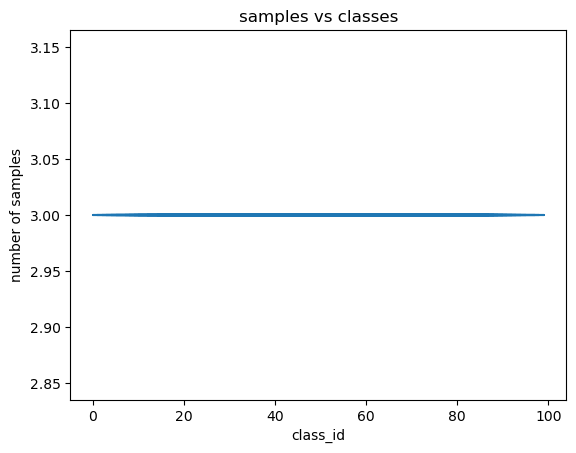

In [27]:
with open('nslt_100_3.json') as fin:
    test = json.load(fin)
    
df = pd.DataFrame(test).transpose()
df['class'] = df.apply(lambda row: row.action[0], axis=1)

plt.plot(df['class'].value_counts())
plt.xlabel('class_id')
plt.ylabel('number of samples')
plt.title('samples vs classes')